In [1]:
from Methods import *

Case I: Comparision of algorithms. In this case, the data matrix $\boldsymbol{X}$ has the shape (200,150) with 70% entries missing. $\boldsymbol{X}$ is generated by $\boldsymbol{A}\boldsymbol{B}^T + e\sim \mathcal{N}(0,5^2)$, where 
$\boldsymbol{A}, \boldsymbol{B}$ have shapes (200,50). We manually set $\lambda =100$ such that the estimated rank is 16. The rank constraint is set as 25.

In [55]:
X = generate_X(m=200, n=150, r=50, prop=0.7, random_state=2)
X += np.random.normal(scale=5, size=(200, 150))
Baseline = SoftImpute_ALS_subspace_dense(
    X, Lambda=100, r=25, sc='objective')
Baseline.matrix_completion(rvar_eps=1e-14, robj_eps=1e-14, max_iter=2000)
print("Obtained rank:",np.where(Baseline.Dsq.diagonal()>=1e-10)[0].shape[0])
AB_inf = Baseline.A.dot(Baseline.B.T)

Algorithm start!
iteration: 1071
relative objective and variable change: 9.864299678779182e-15 3.0262441383808974e-15
Obtained rank: 16


In [56]:
SoftImputer_ALS = SoftImpute_ALS_subspace_dense(
    X, Lambda=100, r=25, sc='variable',AB_inf=AB_inf)
SoftImputer_ALS.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

SoftImputer_nsbs = SoftImpute_ALS_nonsubspace_dense(
    X, Lambda=100, r=25, sc='variable',AB_inf=AB_inf)
SoftImputer_nsbs.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

SoftImputer_SVD = SoftImpute_SVD_dense(X, Lambda=100, r=50, sc='variable',AB_inf=AB_inf)
SoftImputer_SVD.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

MMMF_ALS_solver = MMMF_ALS(X, Lambda=100, r=25, sc='variable',AB_inf=AB_inf)
MMMF_ALS_solver.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

diff: 1.0
Algorithm start!
iteration: 80
relative objective and variable change: 4.987593823655042e-08 9.628327320805534e-08
diff: 1.0
Algorithm start!
iteration: 54
relative objective and variable change: 6.662005015529339e-08 9.302484653760041e-08
diff: 1.0
iteration: 29
relative objective and variable change: 1.3402549008140046e-09 7.048008500412907e-08
diff: 1.0
Algorithm start!
iteration: 56
relative objective and variable change: 6.18569594707286e-08 9.707646920369596e-08


<IPython.core.display.Javascript object>


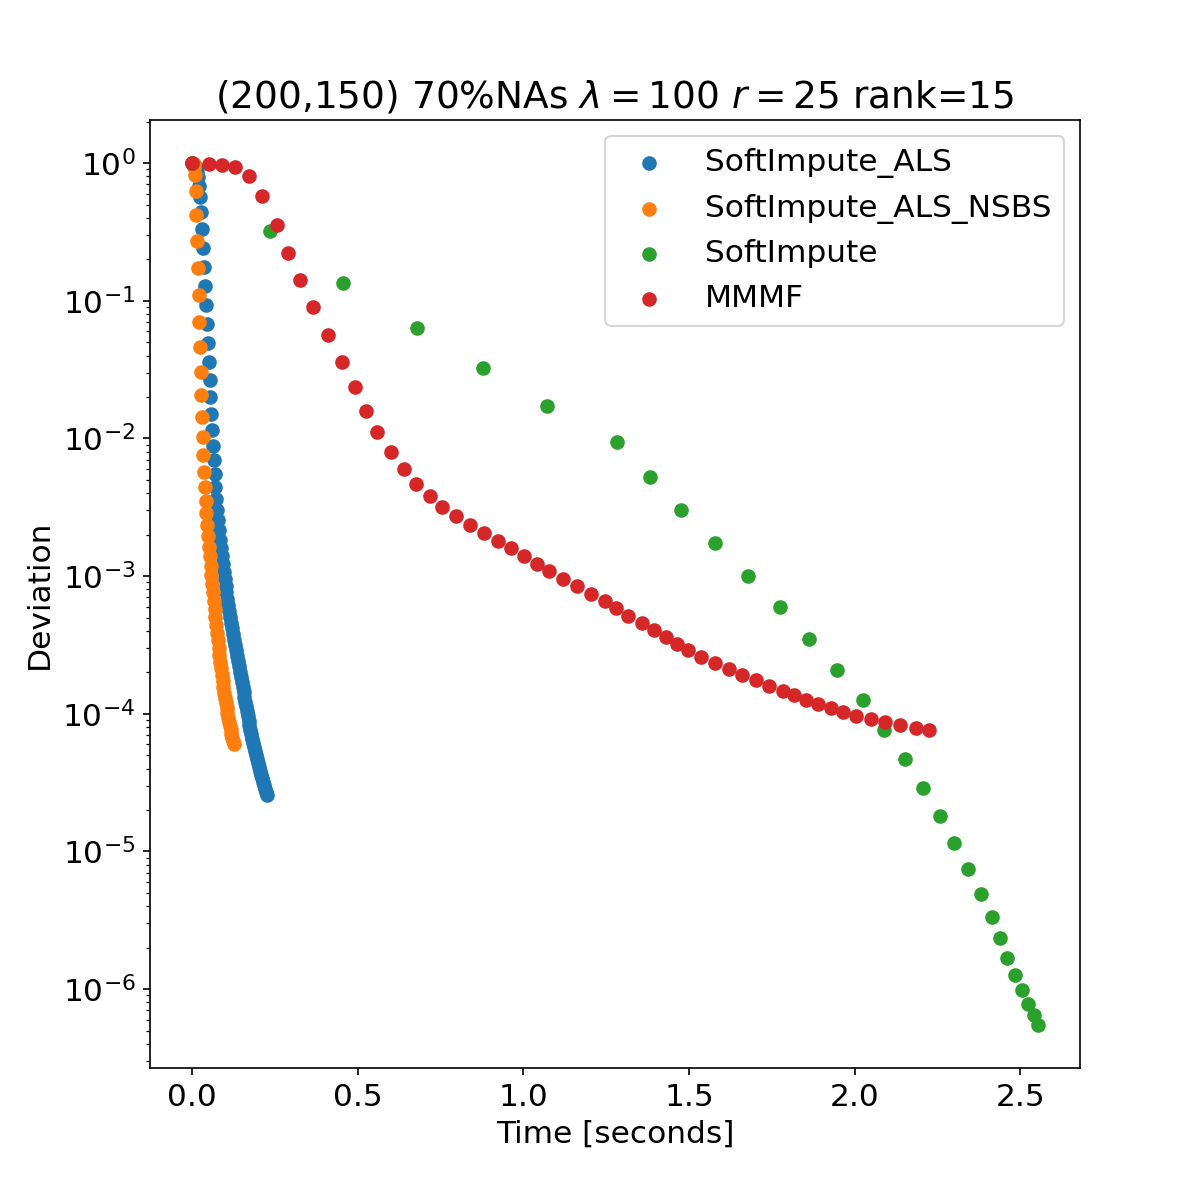

In [95]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(SoftImputer_ALS.running_time,
            SoftImputer_ALS.diff_solu, label='SoftImpute_ALS')
plt.scatter(SoftImputer_nsbs.running_time,
            SoftImputer_nsbs.diff_solu, label='SoftImpute_ALS_NSBS')
plt.scatter(SoftImputer_SVD.running_time,
            SoftImputer_SVD.diff_solu, label='SoftImpute')
plt.scatter(MMMF_ALS_solver.running_time,
            MMMF_ALS_solver.diff_solu, label='MMMF')
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.ylabel('Deviation')
plt.xlabel('Time [seconds]')
plt.yscale('log')

plt.title('(200,150) 70%NAs $\lambda=100$ $r=25$ rank=15')
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.subplots_adjust(top=0.9)
plt.show()

# plt.savefig('timing_experiment_case1.png',dpi=300)


Case II: Comparision of algorithms. In this case, the data matrix $\boldsymbol{X}$ has the shape (600,450) with 80% entries missing. $\boldsymbol{X}$ is generated by $\boldsymbol{A}\boldsymbol{B}^T + e\sim \mathcal{N}(0,5^2)$, where 
$\boldsymbol{A}, \boldsymbol{B}$ have shapes (600,80). We manually set $\lambda =200$ such that the estimated rank is 14. 
The rank constraint is set as 50.

In [115]:
X = generate_X(m=600, n=450, r=80, prop=0.8, random_state=2)
X += np.random.normal(scale=5, size=(600, 450))
Baseline = SoftImpute_ALS_subspace_dense(
    X, Lambda=200, r=50, sc='objective')
Baseline.matrix_completion(rvar_eps=1e-14, robj_eps=1e-14, max_iter=3000)
print("Obtained rank:",np.where(Baseline.Dsq.diagonal()>=1e-10)[0].shape[0])
AB_inf = Baseline.A.dot(Baseline.B.T)

Algorithm start!
iteration: 3000
relative objective and variable change: 9.928965891120588e-14 -4.0057317412593234e-16
Obtained rank: 14


In [116]:
SoftImputer_ALS = SoftImpute_ALS_subspace_dense(
    X, Lambda=200, r=50, sc='variable',AB_inf=AB_inf)
SoftImputer_ALS.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

SoftImputer_nsbs = SoftImpute_ALS_nonsubspace_dense(
    X, Lambda=200, r=50, sc='variable',AB_inf=AB_inf)
SoftImputer_nsbs.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

SoftImputer_SVD = SoftImpute_SVD_dense(X, Lambda=200, r=100, sc='variable',AB_inf=AB_inf)
SoftImputer_SVD.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

MMMF_ALS_solver = MMMF_ALS(X, Lambda=200, r=50, sc='variable',AB_inf=AB_inf)
MMMF_ALS_solver.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=100)

diff: 1.0
Algorithm start!
iteration: 100
relative objective and variable change: 1.1924893075008137e-07 8.225456855800129e-07
diff: 1.0
Algorithm start!
iteration: 100
relative objective and variable change: 1.8825325149141143e-08 1.1494855795989553e-07
diff: 1.0
iteration: 32
relative objective and variable change: 1.4174742876225906e-09 8.15288821136093e-08
diff: 1.0
Algorithm start!
iteration: 100
relative objective and variable change: 2.0274132443234715e-08 1.2384248874409952e-07


<IPython.core.display.Javascript object>


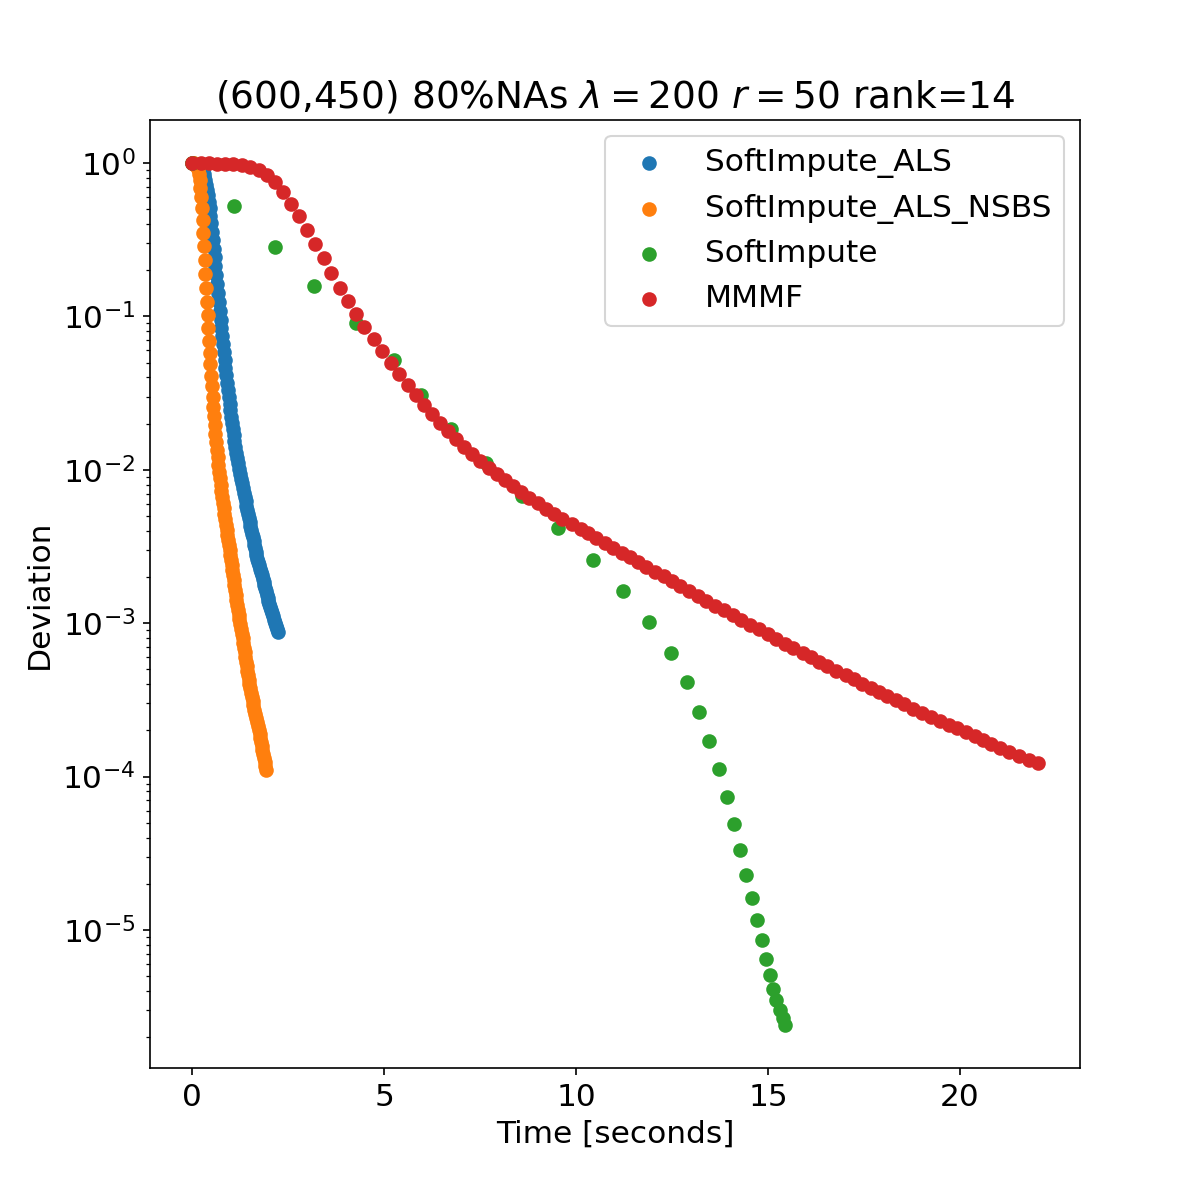

In [117]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(SoftImputer_ALS.running_time,
            SoftImputer_ALS.diff_solu, label='SoftImpute_ALS')
plt.scatter(SoftImputer_nsbs.running_time,
            SoftImputer_nsbs.diff_solu, label='SoftImpute_ALS_NSBS')
plt.scatter(SoftImputer_SVD.running_time,
            SoftImputer_SVD.diff_solu, label='SoftImpute')
plt.scatter(MMMF_ALS_solver.running_time,
            MMMF_ALS_solver.diff_solu, label='MMMF')
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.ylabel('Deviation')
plt.xlabel('Time [seconds]')
plt.yscale('log')

plt.title('(600,450) 80%NAs $\lambda=200$ $r=50$ rank=14')
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.subplots_adjust(top=0.9)
plt.show()
plt.savefig('timing_experiment_case2.png',dpi=300)

Case III: Comparision of algorithms. In this case, the data matrix $\boldsymbol{X}$ has the shape (1000,750) with 90% entries missing. $\boldsymbol{X}$ is generated by $\boldsymbol{A}\boldsymbol{B}^T + e\sim \mathcal{N}(0,5^2)$, where 
$\boldsymbol{A}, \boldsymbol{B}$ have shapes (1000,80). We manually set $\lambda =200$ such that the estimated rank is 26. The rank constraint is set as 50.

In [118]:
X = generate_X(m=1000, n=750, r=80, prop=0.9, random_state=1)
X += np.random.normal(scale=5, size=(1000, 750))
Baseline = SoftImpute_ALS_subspace_dense(
    X, Lambda=170, r=50, sc='objective')
Baseline.matrix_completion(rvar_eps=1e-14, robj_eps=1e-14, max_iter=3000)
print("Obtained rank:",np.where(Baseline.Dsq.diagonal()>=1e-10)[0].shape[0])
AB_inf = Baseline.A.dot(Baseline.B.T)

Algorithm start!
iteration: 3000
relative objective and variable change: 1.7019098868959848e-13 0.0
Obtained rank: 26


In [119]:
SoftImputer_ALS = SoftImpute_ALS_subspace_dense(
    X, Lambda=170, r=50, sc='variable',AB_inf=AB_inf)
SoftImputer_ALS.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=150)

SoftImputer_nsbs = SoftImpute_ALS_nonsubspace_dense(
    X, Lambda=170, r=50, sc='variable',AB_inf=AB_inf)
SoftImputer_nsbs.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=150)

SoftImputer_SVD = SoftImpute_SVD_dense(X, Lambda=170, r=100, sc='variable',AB_inf=AB_inf)
SoftImputer_SVD.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=150)

MMMF_ALS_solver = MMMF_ALS(X, Lambda=170, r=50, sc='variable',AB_inf=AB_inf)
MMMF_ALS_solver.matrix_completion(
    rvar_eps=1e-7, robj_eps=1e-7, max_iter=150)

diff: 1.0
Algorithm start!
iteration: 150
relative objective and variable change: 1.3765428040676471e-08 1.785360672109305e-07
diff: 1.0
Algorithm start!
iteration: 94
relative objective and variable change: 2.2594610173989282e-08 9.391926788102954e-08
diff: 1.0
iteration: 65
relative objective and variable change: 1.408899119477149e-09 9.205552215861751e-08
diff: 1.0
Algorithm start!
iteration: 94
relative objective and variable change: 2.1656391006161848e-08 9.120429683590222e-08


<IPython.core.display.Javascript object>


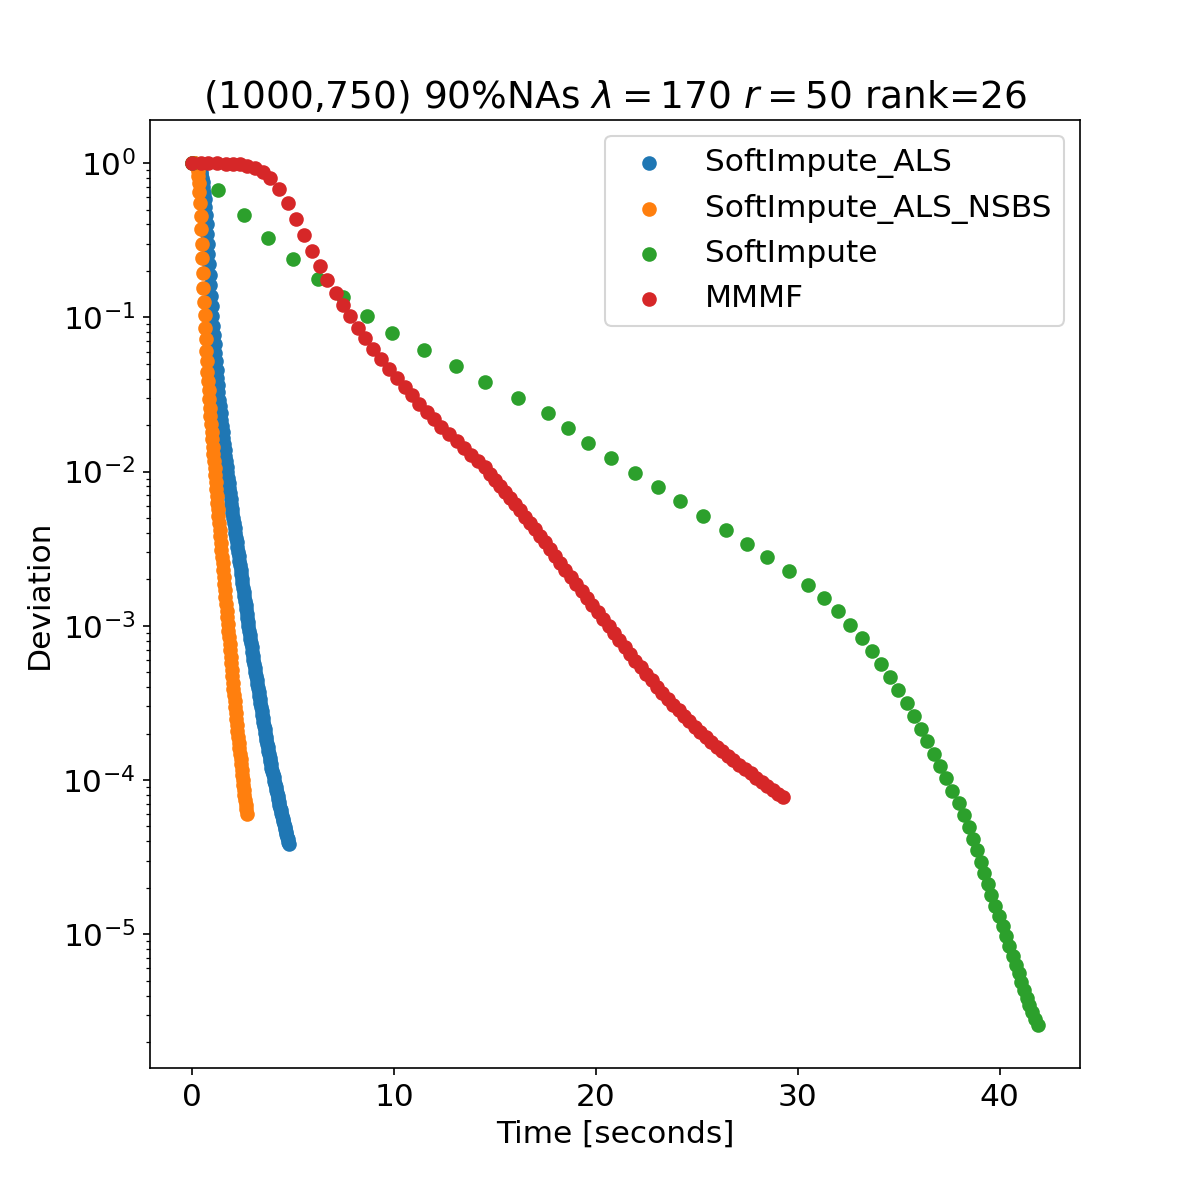

In [120]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(SoftImputer_ALS.running_time,
            SoftImputer_ALS.diff_solu, label='SoftImpute_ALS')
plt.scatter(SoftImputer_nsbs.running_time,
            SoftImputer_nsbs.diff_solu, label='SoftImpute_ALS_NSBS')
plt.scatter(SoftImputer_SVD.running_time,
            SoftImputer_SVD.diff_solu, label='SoftImpute')
plt.scatter(MMMF_ALS_solver.running_time,
            MMMF_ALS_solver.diff_solu, label='MMMF')
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.ylabel('Deviation')
plt.xlabel('Time [seconds]')
plt.yscale('log')

plt.title('(1000,750) 90%NAs $\lambda=170$ $r=50$ rank=26')
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.subplots_adjust(top=0.9)
plt.show()
plt.savefig('timing_experiment_case3.png',dpi=300)

Case IV: Comparision of algorithms. In this case, the data matrix $\boldsymbol{X}$ has the shape (320,240) with 1% entries missing. $\boldsymbol{X}$ is generated by $\boldsymbol{A}\boldsymbol{B}^T + e\sim \mathcal{N}(0,5^2)$, where 
$\boldsymbol{A}, \boldsymbol{B}$ have shapes (320,50). We manually set $\lambda =110$ such that the estimated rank is 31. The rank constraint is set as 35.

In [121]:
X = generate_X(m=320, n=240, r=50, prop=0.01, random_state=1)
X += np.random.normal(scale=5, size=(320, 240))
Baseline = SoftImpute_ALS_subspace_dense(
    X, Lambda=250, r=35, sc='objective')
Baseline.matrix_completion(rvar_eps=1e-14, robj_eps=1e-14, max_iter=3000)
print("Obtained rank:",np.where(Baseline.Dsq.diagonal()>=1e-10)[0].shape[0])
AB_inf = Baseline.A.dot(Baseline.B.T)

Algorithm start!
iteration: 1052
relative objective and variable change: 9.961287355884545e-15 -7.160616587351331e-16
Obtained rank: 31


In [122]:
SoftImputer_ALS = SoftImpute_ALS_subspace_dense(
    X,  Lambda=250, r=35, sc='variable',AB_inf=AB_inf)
SoftImputer_ALS.matrix_completion(
    rvar_eps=1e-10, robj_eps=1e-10, max_iter=300)

SoftImputer_nsbs = SoftImpute_ALS_nonsubspace_dense(
    X,  Lambda=250, r=35, sc='variable',AB_inf=AB_inf)
SoftImputer_nsbs.matrix_completion(
    rvar_eps=1e-10, robj_eps=1e-10, max_iter=300)

SoftImputer_SVD = SoftImpute_SVD_dense(X,  Lambda=250, r=70, sc='variable',AB_inf=AB_inf)
SoftImputer_SVD.matrix_completion(
    rvar_eps=1e-10, robj_eps=1e-10, max_iter=300)

MMMF_ALS_solver = MMMF_ALS(X,  Lambda=250, r=35, sc='variable',AB_inf=AB_inf)
MMMF_ALS_solver.matrix_completion(
    rvar_eps=1e-10, robj_eps=1e-10, max_iter=300)

diff: 1.0
Algorithm start!
iteration: 260
relative objective and variable change: 6.499369384289913e-10 9.840235006999657e-11
diff: 1.0
Algorithm start!
iteration: 209
relative objective and variable change: 2.8397480606000347e-10 9.3811036709993e-11
diff: 1.0
iteration: 6
relative objective and variable change: 4.4551000170947735e-10 5.949382269563093e-11
diff: 1.0
Algorithm start!
iteration: 209
relative objective and variable change: 2.8302865852789373e-10 9.3526774923678e-11


<IPython.core.display.Javascript object>


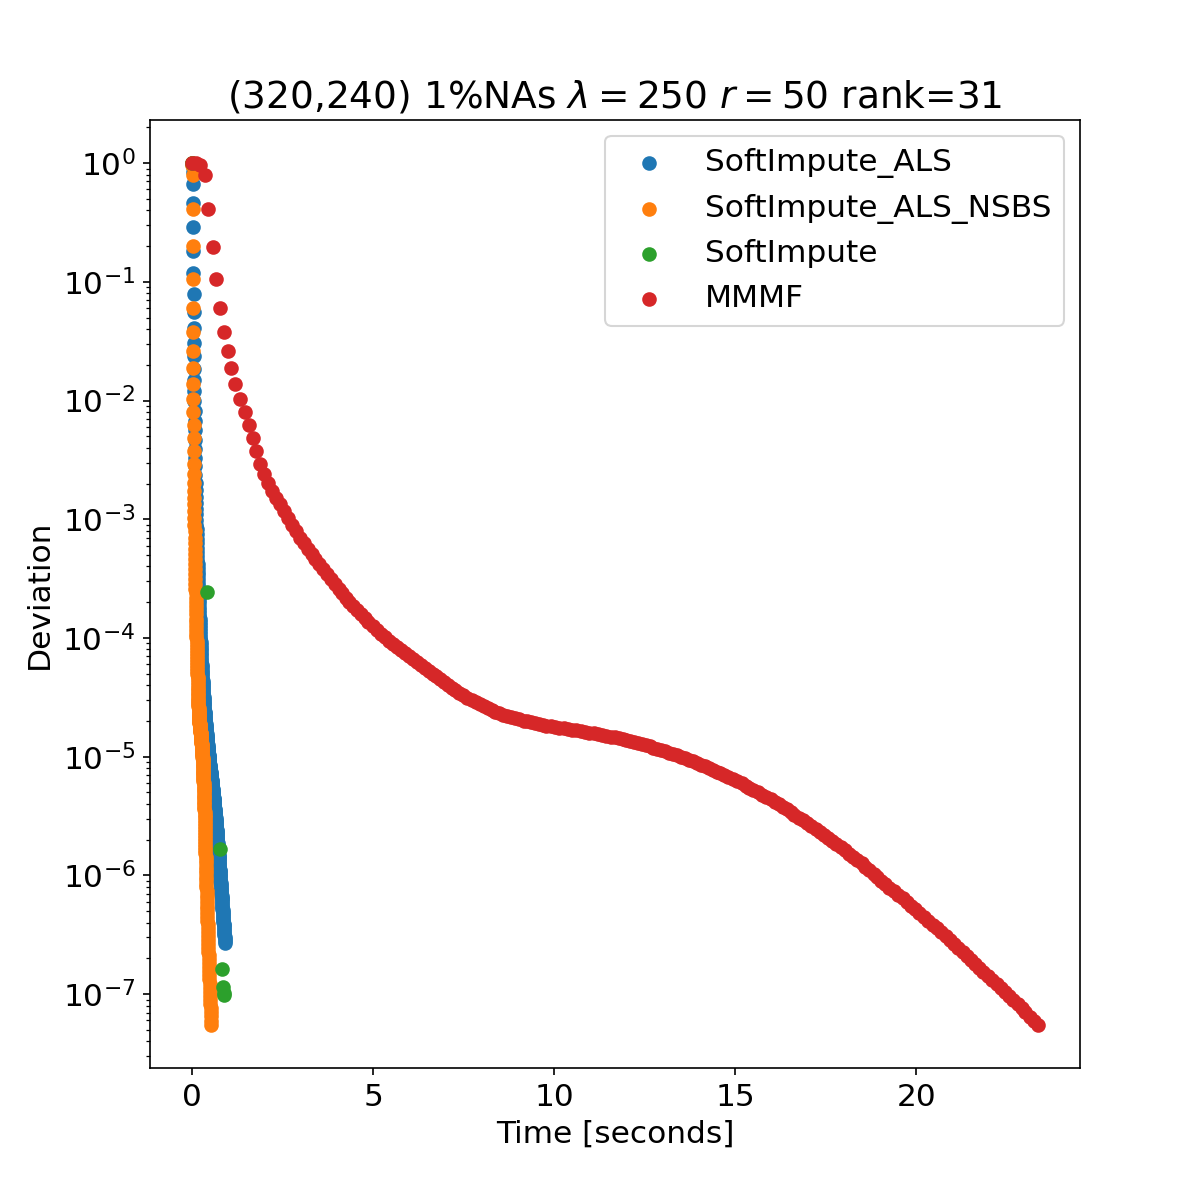

In [123]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.scatter(SoftImputer_ALS.running_time,
            SoftImputer_ALS.diff_solu, label='SoftImpute_ALS')
plt.scatter(SoftImputer_nsbs.running_time,
            SoftImputer_nsbs.diff_solu, label='SoftImpute_ALS_NSBS')
plt.scatter(SoftImputer_SVD.running_time,
            SoftImputer_SVD.diff_solu, label='SoftImpute')
plt.scatter(MMMF_ALS_solver.running_time,
            MMMF_ALS_solver.diff_solu, label='MMMF')
plt.legend()
plt.rcParams.update({'font.size': 15})
plt.ylabel('Deviation')
plt.xlabel('Time [seconds]')
plt.yscale('log')

plt.title('(320,240) 1%NAs $\lambda=250$ $r=50$ rank=31')
plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.subplots_adjust(top=0.9)
plt.show()
plt.savefig('timing_experiment_case4.png',dpi=300)